In [ ]:
# !pip uninstall wrapt
# !pip install wrapt

In [ ]:
# pip install --ignore-installed --upgrade tensorflow
# pip install absl-py

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
# pip install bert-for-tf2

In [ ]:
from tensorflow import keras
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

In [ ]:
# pip install tensorflow_text

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Intent_data.csv")
df.head()

,sentence,BookRestaurant,GetWeather,PlayMusic,RateBook
0,book The Middle East restaurant in IN for noon,1,0,0,0
1,Book a table at T-Rex distant from Halsey St.,1,0,0,0
2,I'd like to eat at a taverna that serves chili...,1,0,0,0
3,I have a party of four in Japan and need a res...,1,0,0,0
4,Please make a restaurant reservation for somew...,1,0,0,0


In [ ]:
li = []
for book,weath,play,rate in zip(df['BookRestaurant'],df['GetWeather'],df['PlayMusic'],df['RateBook']):
    if book == 1:
        li.append(0)
    elif weath == 1:
        li.append(1)
    elif play == 1:
        li.append(2)
    elif rate == 1:
        li.append(3)

In [ ]:
df["Label"] = li
df["Label"].value_counts()

1    2000
2    2000
0    1973
3    1956
Name: Label, dtype: int64

In [ ]:
del df["BookRestaurant"]
del df["GetWeather"]
del df["PlayMusic"]
del df["RateBook"]

In [ ]:
df.shape

(7929, 2)

In [ ]:
# 0 --> "BookRestaurant
# 1 --> "GetWeather"
# 2 --> "PlayMusic"
# 3 --> "RateBook

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(7873, 2)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import seaborn as sns

In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

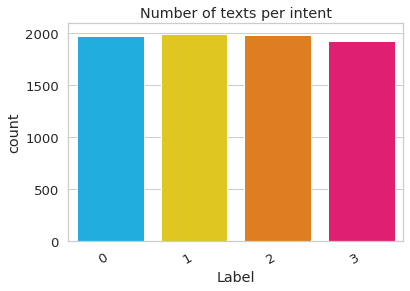

In [ ]:
chart = sns.countplot(df.Label, palette=HAPPY_COLORS_PALETTE)
plt.title("Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(
    df.sentence,
    df.Label,
    test_size = 0.2,
    random_state = 42,
    stratify = df.Label
)

In [ ]:
# Preprocessing
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

# Bert encoder
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2')


In [ ]:
from tensorflow import keras

In [ ]:
# Bert Layers
text_input = tf.keras.layers.Input(shape=(), dtype = tf.string, name = "text")

preprocessed_text = bert_preprocess(text_input)

outputs = bert_encoder(preprocessed_text)

# Neural Network Layers

l = tf.keras.layers.Dropout(rate = 0.1, name='dropout')(outputs['pooled_output'])

l = tf.keras.layers.Dense(4, activation = 'softmax', name = 'output')(l)

#Construct Model

model = tf.keras.Model(inputs = [text_input], outputs = [l])

In [ ]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [ ]:
model.compile(
  optimizer=keras.optimizers.Adam(),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

In [ ]:
# model.fit(X_train, y_train, epochs = 10)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=16,
    shuffle=True,
    epochs=10,
)

Epoch 1/10
355/355 [==============================] - 36s 98ms/step - loss: 0.9113 - accuracy: 0.6710 - val_loss: 0.6040 - val_accuracy: 0.8476
Epoch 2/10
355/355 [==============================] - 34s 97ms/step - loss: 0.5438 - accuracy: 0.8373 - val_loss: 0.4244 - val_accuracy: 0.9000
Epoch 3/10
355/355 [==============================] - 32s 90ms/step - loss: 0.4162 - accuracy: 0.8825 - val_loss: 0.3443 - val_accuracy: 0.9127
Epoch 4/10
355/355 [==============================] - 34s 96ms/step - loss: 0.3497 - accuracy: 0.8954 - val_loss: 0.2925 - val_accuracy: 0.9333
Epoch 5/10
355/355 [==============================] - 37s 103ms/step - loss: 0.3178 - accuracy: 0.9067 - val_loss: 0.2558 - val_accuracy: 0.9397
Epoch 6/10
355/355 [==============================] - 34s 97ms/step - loss: 0.2863 - accuracy: 0.9100 - val_loss: 0.2325 - val_accuracy: 0.9365
Epoch 7/10
355/355 [==============================] - 35s 97ms/step - loss: 0.2625 - accuracy: 0.9206 - val_loss: 0.2145 - val_accuracy

In [ ]:
model.evaluate(X_test,y_test)

50/50 [==============================] - 8s 150ms/step - loss: 0.1745 - accuracy: 0.9498


[0.17445111274719238, 0.9498412609100342]

In [ ]:
from matplotlib.ticker import MaxNLocator

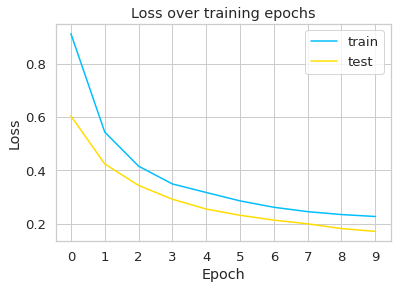

In [ ]:
# Loss over training epochs

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

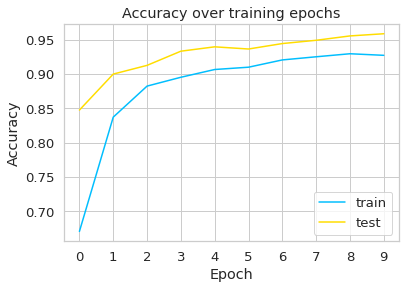

In [ ]:
# Accuracy over training epochs

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [ ]:
_, train_acc = model.evaluate(X_train, y_train,)
_, test_acc = model.evaluate( X_test, y_test)

print("train acc", train_acc)
print("test acc", test_acc)

50/50 [==============================] - 8s 152ms/step - loss: 0.1745 - accuracy: 0.9498
train acc 0.9530009627342224
test acc 0.9498412609100342


In [ ]:
y_pred = model.predict(X_test)

50/50 [==============================] - 8s 153ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# print(classification_report( y_test, y_pred))